In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('credit_risk.csv')
df

,default_label,age,gender,edu,housing,income,job_occupation,past_bad_credit,married
0,0,49,0,2,1,3782.410356,0,1,1
1,0,62,1,3,1,11516.000660,0,1,1
2,0,43,1,2,1,1746.632495,1,1,1
3,0,59,0,0,0,1195.975234,1,1,1
4,0,58,1,4,1,7217.466097,0,1,1
...,...,...,...,...,...,...,...,...,...
13977,0,36,1,2,1,6856.358688,0,1,0
13978,0,44,0,0,1,2245.684172,0,1,0
13979,0,47,0,1,1,14793.528320,0,1,1
13980,0,62,0,0,1,2118.337362,0,1,1


In [3]:
df['default_label'].sum() / len(df)

0.022028322128450864

# Simple Logistic Model

In [4]:
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')



AUC: 0.5887058860402432


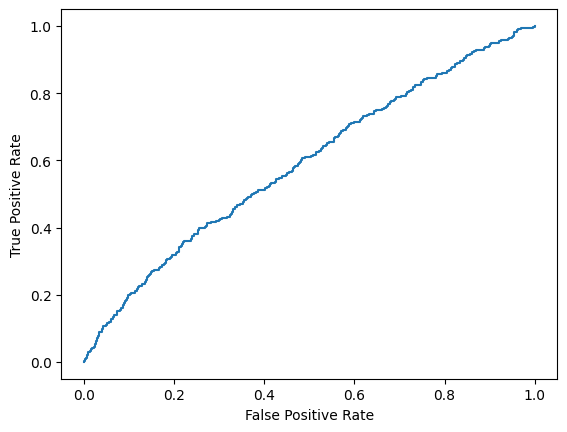

In [5]:
from sklearn.metrics import roc_auc_score
mod = LogisticRegression()
rres = mod.fit(y = df['default_label'], X=df[['past_bad_credit', 'income']])
default_label_pred = mod.predict(df[['past_bad_credit', 'income']])
plot_roc_curve(df['default_label'], mod.predict_proba(df[['past_bad_credit', 'income']])[:,1])
true_labels = df['default_label']
predicted_probabilities = mod.predict_proba(df[['past_bad_credit', 'income']])[:, 1]

auc = roc_auc_score(true_labels,predicted_probabilities)
print(f"AUC: {auc}")


# Full Logistic Model

C:\Users\ly0001\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


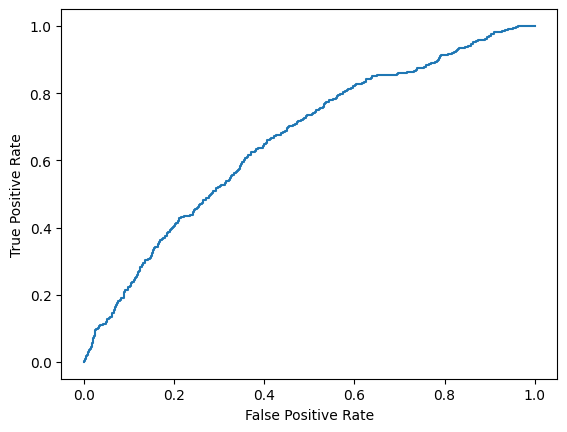

In [6]:
mod = LogisticRegression()
X=df.drop(columns=['default_label'])
rres = mod.fit(y = df['default_label'], X=X)
default_label_pred = mod.predict(X)
plot_roc_curve(df['default_label'], mod.predict_proba(X)[:,1])
true_labels = df['default_label']
predicted_probabilities = mod.predict_proba(X)[:, 1]



In [7]:
print(f"model 1 accuracy score: {mod.score(X, df['default_label'])}")
auc = roc_auc_score(true_labels, predicted_probabilities)
print(f"AUC: {auc}")

model 1 accuracy score: 0.9779716778715491
AUC: 0.6610184462312588


# SVM/ Random Forest

## SVM

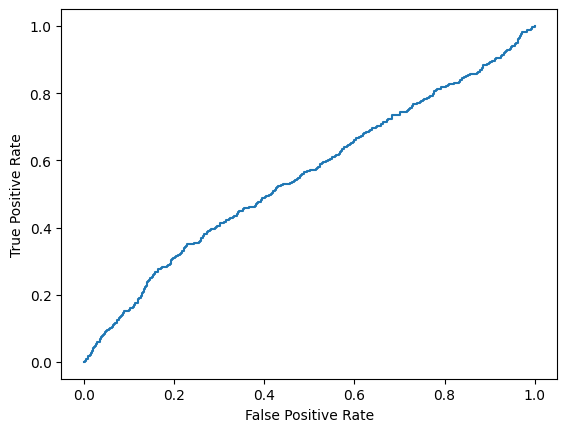

In [8]:
# SVM
mod = svm.SVC(probability=True)
rres = mod.fit(y = df['default_label'], X=X)
default_label_pred = mod.predict(X)
plot_roc_curve(df['default_label'], mod.predict_proba(X)[:,1])

In [9]:
# SVM using RBF kernel
mod = svm.SVC(class_weight='balanced',kernel='rbf', probability=True)
rres = mod.fit(y = df['default_label'], X=X)
default_label_pred = mod.predict(X)
plot_roc_curve(df['default_label'], mod.predict_proba(X)[:,1])

true_labels = df['default_label']
predicted_probabilities = mod.predict_proba(X)[:, 1]
auc = roc_auc_score(true_labels, predicted_probabilities)
print(f"AUC: {auc}")

In [ ]:
print(f"model 1 accuracy score: {accuracy_score(df['default_label'], default_label_pred)}")


model 1 accuracy score: 0.7311543412959519


In [ ]:
# RBF kernel SVM
mod = svm.SVC(kernel='rbf', probability=True)
rres = mod.fit(y = df['default_label'], X=X)
default_label_pred = mod.predict(X)
plot_roc_curve(df['default_label'], mod.predict_proba(X)[:,1])

true_labels = df['default_label']
predicted_probabilities = mod.predict_proba(X)[:, 1]
auc = roc_auc_score(true_labels, predicted_probabilities)
print(f"AUC: {auc}")

ValueError: Found input variables with inconsistent numbers of samples: [10000, 13982]

In [ ]:
# kernel SVM
mod = svm.SVC(class_weight='balanced',kernel='sigmoid', probability=True)
rres = mod.fit(y = df['default_label'], X=X)
default_label_pred = mod.predict(X)
plot_roc_curve(df['default_label'], mod.predict_proba(X)[:,1])

true_labels = df['default_label']
predicted_probabilities = mod.predict_proba(X)[:, 1]
auc = roc_auc_score(true_labels, predicted_probabilities)
print(f"AUC: {auc}")

ValueError: Found input variables with inconsistent numbers of samples: [10000, 13982]

AUC: 0.4457077038801479


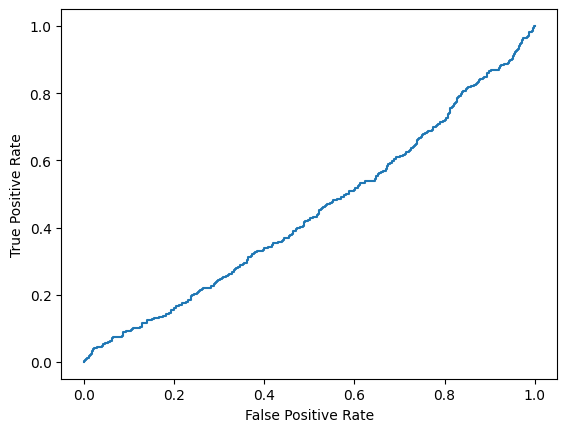

In [ ]:
# polynomial kernel SVM
mod = svm.SVC(class_weight='balanced',kernel='poly', probability=True)
rres = mod.fit(y = df['default_label'], X=X)
default_label_pred = mod.predict(X)
plot_roc_curve(df['default_label'], mod.predict_proba(X)[:,1])

true_labels = df['default_label']
predicted_probabilities = mod.predict_proba(X)[:, 1]
auc = roc_auc_score(true_labels, predicted_probabilities)
print(f"AUC: {auc}")

# Out-of-Sample Test

In [ ]:
df_train = df[:10000]
df_test = df[10001:]

## Logistic

## SVM

model 1 accuracy score: 0.9799045465963325
AUC: 0.44904191233017177


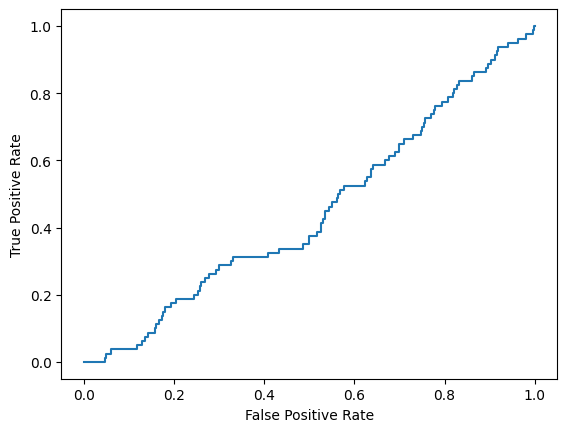

In [ ]:
y = df_train['default_label']
X = df_train.drop(columns=['default_label'])
X_test = df_test.drop(columns=['default_label'])
y_test = df_test['default_label']
mod = svm.SVC(kernel='rbf', probability=True)
rres = mod.fit(y = y, X=X)
default_label_pred = mod.predict(X_test)
plot_roc_curve(y_test, mod.predict_proba(X_test)[:,1])
print(f"model 1 accuracy score: {accuracy_score(y_test, default_label_pred)}")

true_labels = df_test['default_label']
predicted_probabilities = mod.predict_proba(X_test)[:, 1]
auc = roc_auc_score(true_labels, predicted_probabilities)
print(f"AUC: {auc}")


## Random Forest

model 1 accuracy score: 0.9796533534287868
AUC: 0.5571648295308895


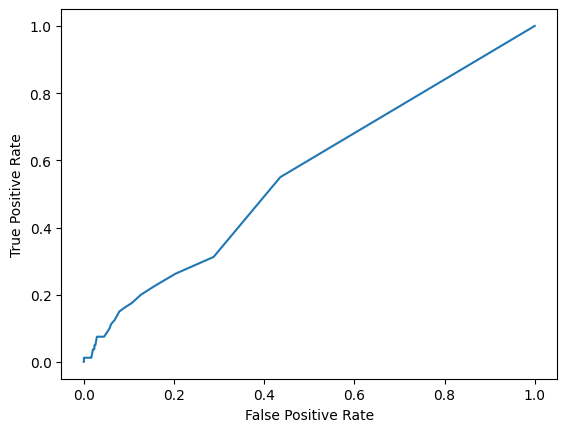

In [ ]:
y = df_train['default_label']
X = df_train.drop(columns=['default_label'])
X_test = df_test.drop(columns=['default_label'])
y_test = df_test['default_label']
mod = RandomForestClassifier()
rres = mod.fit(y = y, X=X)
default_label_pred = mod.predict(X_test)
plot_roc_curve(y_test, mod.predict_proba(X_test)[:,1])
print(f"model 1 accuracy score: {accuracy_score(y_test, default_label_pred)}")

true_labels = df_test['default_label']
predicted_probabilities = mod.predict_proba(X_test)[:, 1]
auc = roc_auc_score(true_labels, predicted_probabilities)
print(f"AUC: {auc}")



## XGBoosting
Wu, W. (2022) Machine Learning Approaches to Predict Loan Default. Intelligent Information Management, 14, 157-164. doi: 10.4236/iim.2022.145011.


Accuracy: 0.9791509670936951
model 1 accuracy score: 0.9791509670936951
AUC: 0.5737070622917201


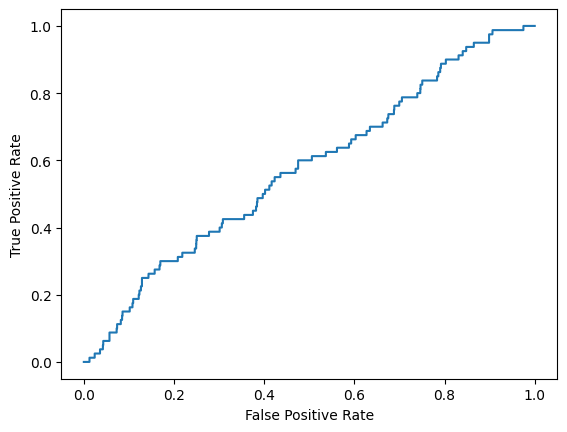

In [ ]:
# Create an instance of the XGBoost classifier
import xgboost as xgb
xgb_model = xgb.XGBClassifier()

# Fit the model on the training data
xgb_model.fit(X, y)

# Make predictions on the testing data
xgb_predictions = xgb_model.predict(X_test)

# Print the accuracy score
accuracy = accuracy_score(y_test, xgb_predictions)
print(f"Accuracy: {accuracy}")

# Plot the ROC curve
default_label_pred = xgb_model.predict(X_test)
plot_roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
print(f"model 1 accuracy score: {accuracy_score(y_test, default_label_pred)}")

# Print AUC
true_labels = df_test['default_label']
predicted_probabilities = xgb_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(true_labels, predicted_probabilities)
print(f"AUC: {auc}")

## Logistic regression

Logistic Regression Accuracy: 0.9799045465963325
Logistic Regression AUC: 0.6291752114842347


C:\Users\ly0001\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


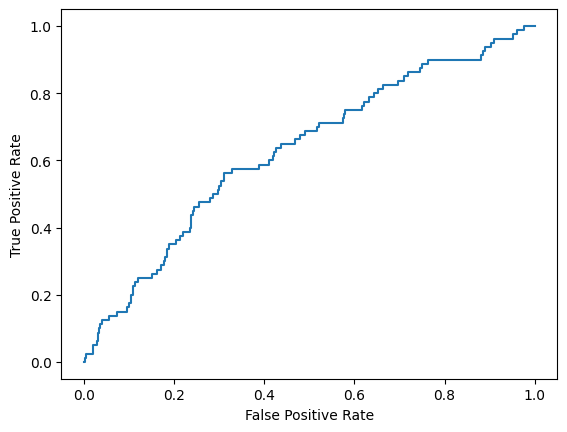

In [ ]:
# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X, y)

# Make predictions on the test data
logreg_predictions = logreg.predict(X_test)

# Calculate accuracy score
logreg_accuracy = accuracy_score(y_test, logreg_predictions)

# Plot the ROC curve
default_label_pred = logreg.predict(X_test)
plot_roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
# print(f"model 1 accuracy score: {accuracy_score(y_test, default_label_pred)}")

# Calculate AUC
logreg_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

# Print the results
print(f"Logistic Regression Accuracy: {logreg_accuracy}")
print(f"Logistic Regression AUC: {logreg_auc}")

## Neural Network

@article{cite-key,
	abstract = {Default prediction is the primary goal of credit risk management. This problem has long been tackled using well-established statistical classification models. Still, nowadays, the availability of large datasets and cheap software implementations makes it possible to employ machine learning techniques. This paper uses a large sample of small Italian companies to compare the performance of various machine learning classifiers and a more traditional logistic regression approach. In particular, we perform feature selection, use the algorithms for default prediction, evaluate their accuracy, and find a more suitable threshold as a function of sensitivity and specificity. Our outcomes suggest that machine learning is slightly better than logistic regression. However, the relatively small performance gain is insufficient to conclude that classical statistical classifiers should be abandoned, as they are characterized by more straightforward interpretation and implementation.},
	author = {Bazzana, Flavio and Bee, Marco and Hussin Adam Khatir, Ahmed Almustfa},
	date = {2023/11/15},
	date-added = {2024-04-18 21:22:55 +0800},
	date-modified = {2024-04-18 21:22:55 +0800},
	doi = {10.1057/s41283-023-00132-2},
	id = {Bazzana2023},
	isbn = {1743-4637},
	journal = {Risk Management},
	number = {1},
	pages = {1},
	title = {Machine learning techniques for default prediction: an application to small Italian companies},
	url = {https://doi.org/10.1057/s41283-023-00132-2},
	volume = {26},
	year = {2023},
	bdsk-url-1 = {https://doi.org/10.1057/s41283-023-00132-2}}


model 1 accuracy score: 0.9799045465963325


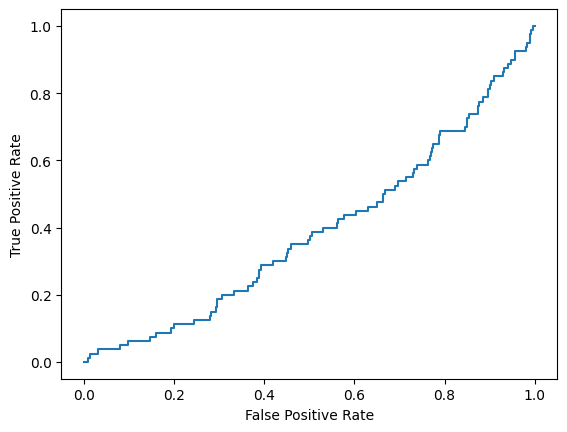

In [ ]:
y = df_train['default_label']
X = df_train.drop(columns=['default_label'])
X_test = df_test.drop(columns=['default_label'])
y_test = df_test['default_label']
mod = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000)
rres = mod.fit(y = y, X=X)
default_label_pred = mod.predict(X_test)
plot_roc_curve(y_test, mod.predict_proba(X_test)[:,1])
print(f"model 1 accuracy score: {accuracy_score(y_test, default_label_pred)}")
